In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf

2023-02-09 22:02:49.386145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 22:02:49.386175: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("FER2013/train/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("FER2013/test/", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

2023-02-09 22:02:57.174098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 22:02:57.174382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 22:02:57.174519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-09 22:02:57.174626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-09 22:02:57.184664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [4]:
rlrp = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy', save_weights_only=True, mode='max',verbose=1)
history=model.fit(x=train_generator,steps_per_epoch=train_generator.n//train_generator.batch_size, epochs=25, callbacks=[rlrp], validation_data=validation_generator)

Epoch 1/25
448/448 [==============================] - 200s 445ms/step - loss: 1.7968 - accuracy: 0.3169 - val_loss: 1.6599 - val_accuracy: 0.3629 - lr: 5.0000e-04
Epoch 2/25
448/448 [==============================] - 193s 431ms/step - loss: 1.4711 - accuracy: 0.4372 - val_loss: 1.4206 - val_accuracy: 0.4537 - lr: 5.0000e-04
Epoch 3/25
448/448 [==============================] - 195s 434ms/step - loss: 1.3277 - accuracy: 0.4880 - val_loss: 1.4406 - val_accuracy: 0.4407 - lr: 5.0000e-04
Epoch 4/25
448/448 [==============================] - 196s 438ms/step - loss: 1.2456 - accuracy: 0.5246 - val_loss: 1.1745 - val_accuracy: 0.5460 - lr: 5.0000e-04
Epoch 5/25
448/448 [==============================] - 189s 423ms/step - loss: 1.1915 - accuracy: 0.5461 - val_loss: 1.1390 - val_accuracy: 0.5690 - lr: 5.0000e-04
Epoch 6/25
448/448 [==============================] - 186s 416ms/step - loss: 1.1498 - accuracy: 0.5622 - val_loss: 1.1221 - val_accuracy: 0.5716 - lr: 5.0000e-04
Epoch 7/25
448/448 [==

In [5]:
"""frame = FER2013/test/angry/PrivateTest_88305.jpg
model.predict('FER2013/test/angry/PrivateTest_88305.jpg')"""

"frame = FER2013/test/angry/PrivateTest_88305.jpg\nmodel.predict('FER2013/test/angry/PrivateTest_88305.jpg')"

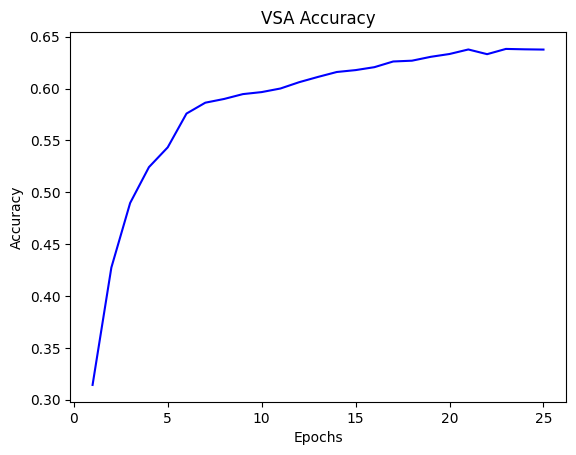

In [6]:
acc = history.history['accuracy']
epochs = range(1,26)
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.title('VSA Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [14]:
import cv2
cap = cv2.VideoCapture(0)
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces_rect = cascade.detectMultiScale(
    gray, scaleFactor=1.1, minNeighbors=9)
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(frame, (x, y), (x+48, y+48), (0, 255, 0), 2)
    cv2.imshow('frame',frame)
    print(model.predict(frame))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
